In [218]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
#from cftime import datetime 
from datetime import datetime, timedelta
#import datetime as dt
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
#jet = mcm.get_cmap('jet')
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import sys
import os
import psutil
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
import time
from time import process_time
from tqdm import tqdm
from dask.distributed import LocalCluster, Client
import dask.array as da
import dask.dataframe as dd
import dask
from dask import delayed
from dask.diagnostics import ProgressBar  # Import the ProgressBar class
import calendar
import glob
%matplotlib inline 
#import line_profiler
#%load_ext line_profiler

/tmp/ipykernel_1073416/1870643686.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


In [223]:
file = 'Nc_Files/SpE_Output/Wuhu_IonTr_run_SpE_Output_Dec-Feb.nc'
ds_win = xr.open_dataset(file)
ds_win

<xarray.Dataset>
Dimensions:                   (lev_sl: 25, time: 336, lat: 96, latsl: 36,
                               lon: 144, LT: 48, LT_L: 144, timesl: 2, mth: 3)
Coordinates:
  * lev_sl                    (lev_sl) float64 1.473e-05 1.891e-05 ... 0.00601
  * time                      (time) float64 0.0 1.0 2.0 ... 333.0 334.0 335.0
  * lat                       (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * latsl                     (latsl) float64 -87.5 -82.5 -77.5 ... 82.5 87.5
  * lon                       (lon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * LT                        (LT) float64 0.0 0.5106 1.021 ... 22.98 23.49 24.0
  * LT_L                      (LT_L) float64 0.0 0.1678 0.3357 ... 23.83 24.0
  * timesl                    (timesl) float64 0.0 1.0
  * mth                       (mth) float64 12.0 1.0 2.0
Data variables: (12/20)
    Zavg_sl                   (lev_sl) float64 ...
    times_str_min             (mth, timesl) object ...
    times_str_max             (mth, timesl) object ...
    SpEs_Occ_Fr_b_dsavglevLT  (lat) float64 ...
    SpEs_Occ_Fr_b_dsavglev    (lat, LT) float64 ...
    SpEs_Occ_Fr_b_avglev      (lat, LT, mth) float64 ...
    ...                        ...
    SpEsns_Occ_Fr_dsavg       (lev_sl, lat, lon) float64 ...
    SpEsns_Occ_Fr_avg         (lev_sl, lat, lon, mth) float64 ...
    SpEs                      (lev_sl, time, lat, LT_L, timesl, mth) float64 ...
    Mptdens_sh                (lev_sl, time, lat, LT_L, timesl, mth) float64 ...
    SpEsns                    (lev_sl, time, lat, lon, timesl, mth) float64 ...
    Mptdensns                 (lev_sl, time, lat, lon, timesl, mth) float64 ...

In [227]:

lev_sl = ds_win.variables['lev_sl']
lat = ds_win.variables['lat']
intlat = ds_win.variables['latsl']
lon = ds_win.variables['lon']
LT = ds_win.variables['LT']
LT_L = ds_win.variables['LT_L']

Zavg_sl = ds_win.variables['Zavg_sl']
times_str_min = ds_win.variables['times_str_min']
times_str_max = ds_win.variables['times_str_max']

SpEs = ds_win['SpEs'] #(25, 336, 96, 144, 2, 3)
Mptdens_sh = ds_win['Mptdens_sh']

SpEsns = ds_win['SpEsns']
Mptdensns = ds_win['Mptdensns']

In [228]:
####### Choose altitude for plot and select variables ########

# Specify the desired altitude in km
desired_altitude_km = 90.0

# Find the index of the closest altitude in geopH
closest_altitude_index = np.abs(Zavg_sl - desired_altitude_km).argmin(dim='lev_sl')

# Use the index to select values from the 'Factor' variable
SpEs_sl = SpEs.isel(lev_sl=closest_altitude_index)
Mptdens_sh_sl = Mptdens_sh.isel(lev_sl=closest_altitude_index)

SpEsns_sl = SpEsns.isel(lev_sl=closest_altitude_index)
Mptdensns_sl = Mptdensns.isel(lev_sl=closest_altitude_index)

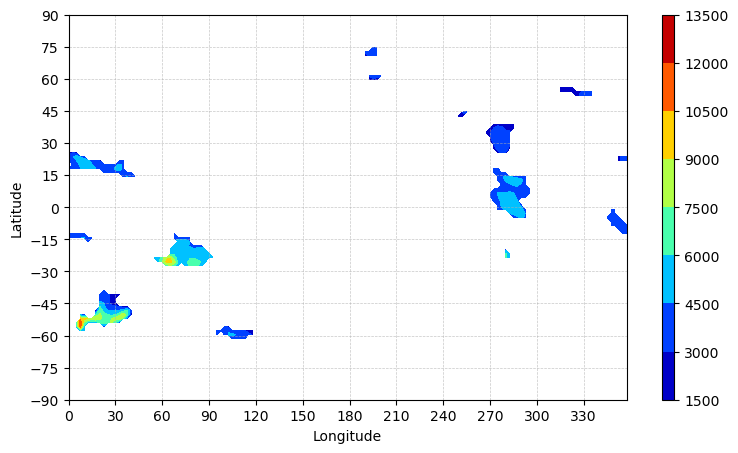

In [229]:

SpEsns_plot = SpEsns_sl[0, :, :, 0, 0]

fig, ax = plt.subplots(figsize=(9,5))

contour = ax.contourf(lon, lat, SpEsns_plot, cmap='jet')
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30)

ax.set_yticks(np.arange(-90, 91, 15))
ax.set_ylabel('Latitude')

# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Set x ticks every 30 degrees
ax.set_xticks(np.arange(0,360, 30))
ax.set_xlabel('Longitude')

plt.show()

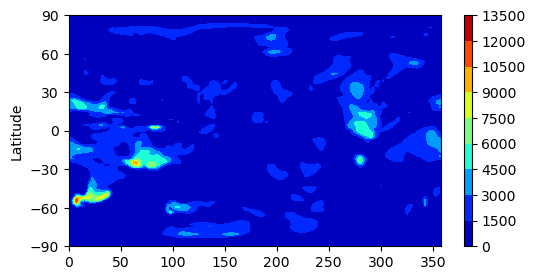

In [230]:
Mptdensns_sl_plot = Mptdensns_sl[0,:,:,0,0]


fig, ax = plt.subplots(figsize=(6,3), )
contour = ax.contourf(lon, lat, Mptdensns_sl_plot, cmap='jet'#, levels=np.linspace(0, 0.5, 11)
                      )
cbar = plt.colorbar(contour
                    #, label=''
                    , ax=ax, orientation='vertical', pad=0.05, aspect=30)#, shrink=0.5)

ax.set_yticks(np.linspace(-90, 90, 7))
ax.set_ylabel('Latitude')

plt.show()

In [234]:
# target_lat = -53.5
# target_lon = 6.25

target_lat = 0
target_lon = 285

# Find the nearest indices
lat_idx = int(np.abs(lat - target_lat).argmin())
lon_idx = int(np.abs(lon - target_lon).argmin())

# Select the data based on the nearest indices
sel_Mptdensns = Mptdensns.isel(lat=lat_idx, lon=lon_idx)
sel_SpEsns = SpEsns.isel(lat=lat_idx, lon=lon_idx)

/tmp/ipykernel_1073416/1922281554.py:8: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  lat_idx = int(np.abs(lat - target_lat).argmin())
/tmp/ipykernel_1073416/1922281554.py:9: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  lon_idx = int(np.abs(lon - target_lon).argmin())


/tmp/ipykernel_1073416/2669568457.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), ha='center')


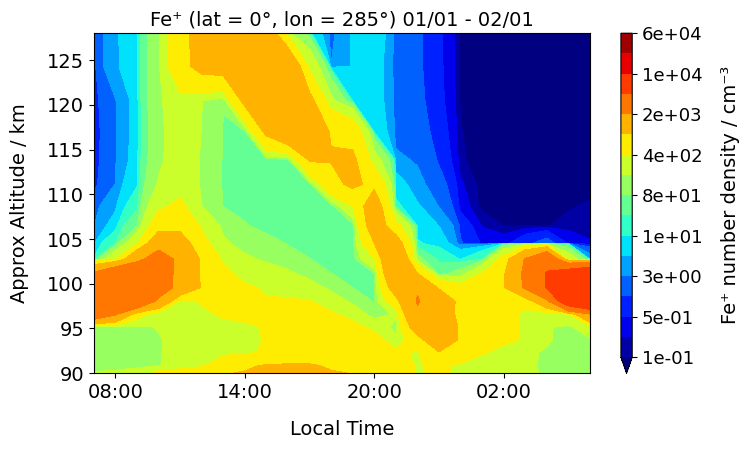

In [239]:
####   Log Scale  ######
####   Mptdensns  ######

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import LogNorm

hr = 12
timezoneshift = -5
starthr = hr+timezoneshift

sel_Mptdensns_plot = sel_Mptdensns[:, hr:hr+24, 0, 0]

# Assuming UT_Plot is in datetime format with hourly increments
start_date = datetime(2023, 1, 1, starthr)


num_days = 1  # Adjust the number of days as needed
UT_Plot = [start_date + timedelta(hours=starthr) for starthr in range(0, 24 * num_days)]

fig, ax = plt.subplots(figsize=(8, 5))

# Set the colorbar limits
vmin = 1e-1
vmax = 6e4

# Specify the number of levels (adjust as needed)
num_levels = 17

# Use LogNorm for log scale
contour = ax.contourf(UT_Plot, Zavg_sl, sel_Mptdensns_plot, cmap='jet',
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                      extend='min'
                     )

cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30, format='%.0e')

# Adjust the position of the colorbar label
cbar.set_label('Fe⁺ number density / cm⁻³', fontsize=14, labelpad=13)

cbar.ax.tick_params(labelsize=13)

# Set labels and title as needed
ax.set_xlabel('Local Time', fontsize=14, labelpad=13)
ax.set_ylabel('Approx Altitude / km', fontsize=14, labelpad=13)
ax.set_ylim([90, 128])

ax.set_title(f'Fe⁺ (lat = {target_lat}\u00b0, lon = {target_lon}\u00b0) 01/01 - 02/01', fontsize=14)


# Ensure a nice layout for the datetime x-axis labels
fig.autofmt_xdate()

# Shrink the size of the x-axis labels and set them horizontal
for label in ax.get_xticklabels():
    label.set_fontsize(12)
    label.set_rotation(0)  # Horizontal alignment

# Center the x-axis labels around each tick
ax.set_xticklabels(ax.get_xticks(), ha='center')
# Format x-axis with datetime labels
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Set major locator every 2 hours
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)

# Set the colorbar limits
contour.set_clim(vmin, vmax)

# Increase font size of y tick labels
ax.tick_params(axis='both', which='major', labelsize=14)


start_date_str = str(start_date).replace(' ', '_')

figname = f'Es_Layer_lat_{target_lat}_lon_{target_lon}_{start_date_str}LT.png'
plt.savefig('./Figures/Wuhu_IonTr_run/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

/tmp/ipykernel_1073416/1092380194.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), ha='center')


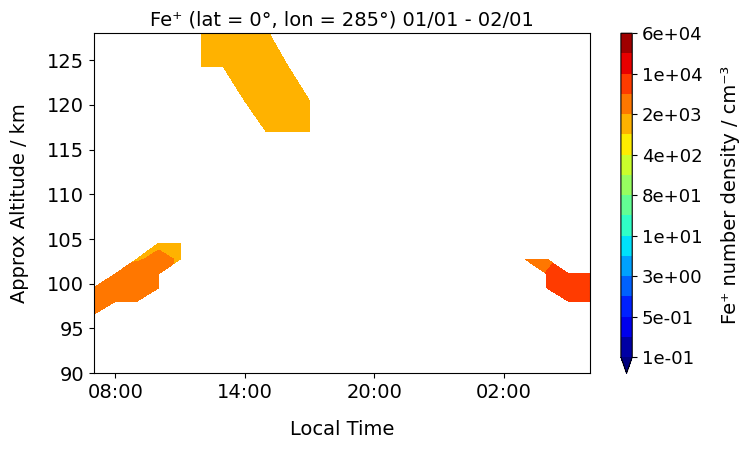

In [240]:
####   Log Scale  ######
####  sel_SpEsns  ######

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import LogNorm

hr = 12
timezoneshift = -5
starthr = hr+timezoneshift

sel_SpEsns_plot = sel_SpEsns[:, hr:hr+24, 0, 0]

# Assuming UT_Plot is in datetime format with hourly increments
start_date = datetime(2023, 1, 1, starthr)


num_days = 1  # Adjust the number of days as needed
UT_Plot = [start_date + timedelta(hours=starthr) for starthr in range(0, 24 * num_days)]

fig, ax = plt.subplots(figsize=(8, 5))

# Set the colorbar limits
vmin = 1e-1
vmax = 6e4

# Specify the number of levels (adjust as needed)
num_levels = 17

# Use LogNorm for log scale
contour = ax.contourf(UT_Plot, Zavg_sl, sel_SpEsns_plot, cmap='jet',
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                      extend='min'
                     )

cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30, format='%.0e')

# Adjust the position of the colorbar label
cbar.set_label('Fe⁺ number density / cm⁻³', fontsize=14, labelpad=13)

cbar.ax.tick_params(labelsize=13)

# Set labels and title as needed
ax.set_xlabel('Local Time', fontsize=14, labelpad=13)
ax.set_ylabel('Approx Altitude / km', fontsize=14, labelpad=13)
ax.set_ylim([90, 128])

ax.set_title(f'Fe⁺ (lat = {target_lat}\u00b0, lon = {target_lon}\u00b0) 01/01 - 02/01', fontsize=14)


# Ensure a nice layout for the datetime x-axis labels
fig.autofmt_xdate()

# Shrink the size of the x-axis labels and set them horizontal
for label in ax.get_xticklabels():
    label.set_fontsize(12)
    label.set_rotation(0)  # Horizontal alignment

# Center the x-axis labels around each tick
ax.set_xticklabels(ax.get_xticks(), ha='center')
# Format x-axis with datetime labels
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Set major locator every 2 hours
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)

# Set the colorbar limits
contour.set_clim(vmin, vmax)

# Increase font size of y tick labels
ax.tick_params(axis='both', which='major', labelsize=14)


start_date_str = str(start_date).replace(' ', '_')

figname = f'Es_Layer_sel_lat_{target_lat}_lon_{target_lon}_{start_date_str}LT.png'
plt.savefig('./Figures/Wuhu_IonTr_run/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

/tmp/ipykernel_1073416/2835715952.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), ha='center')


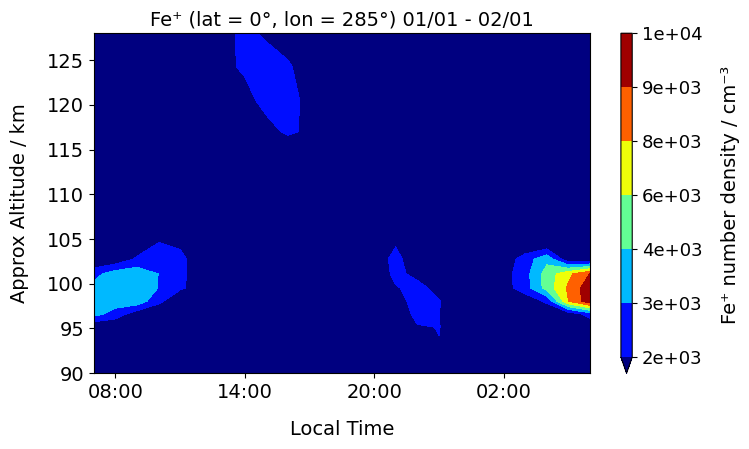

In [246]:
#### Linear Scale ######
####   Mptdensns  ######

hr = 12
timezoneshift = -5
starthr = hr+timezoneshift

sel_Mptdensns_plot = sel_Mptdensns[:, hr:hr+24, 0, 0]

# Assuming UT_Plot is in datetime format with hourly increments
start_date = datetime(2023, 1, 1, starthr)

num_days = 1  # Adjust the number of days as needed
UT_Plot = [start_date + timedelta(hours=starthr) for starthr in range(0, 24 * num_days)]


fig, ax = plt.subplots(figsize=(8, 5))

vmin = 1e3
vmax = 1e4
num_levels = 17

contour = ax.contourf(UT_Plot, Zavg_sl, sel_Mptdensns_plot, cmap='jet',
                      norm=Normalize(vmin=vmin, vmax=vmax),
                      #norm=Normalize(),
                      #levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                      extend='min'
                     )

cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30, format='%.0e')
cbar.set_label('Fe⁺ number density / cm⁻³', fontsize=14, labelpad=13)
cbar.ax.tick_params(labelsize=13)
#contour.set_clim(vmin, vmax)

# Set labels and title as needed
ax.set_xlabel('Local Time', fontsize=14, labelpad=13)
ax.set_ylabel('Approx Altitude / km', fontsize=14, labelpad=13)
ax.set_ylim([90, 128])

ax.set_title(f'Fe⁺ (lat = {target_lat}\u00b0, lon = {target_lon}\u00b0) 01/01 - 02/01', fontsize=14)

# Ensure a nice layout for the datetime x-axis labels
fig.autofmt_xdate()
# Shrink the size of the x-axis labels and set them horizontal
for label in ax.get_xticklabels():
    label.set_fontsize(12)
    label.set_rotation(0)  # Horizontal alignment
# Center the x-axis labels around each tick
ax.set_xticklabels(ax.get_xticks(), ha='center')
# Format x-axis with datetime labels
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Set major locator every 2 hours
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)

ax.tick_params(axis='both', which='major', labelsize=14)

start_date_str = str(start_date).replace(' ', '_')
figname = f'Linear_Es_Layer_lat_{target_lat}_lon_{target_lon}_{start_date_str}LT.png'
plt.savefig('./Figures/Wuhu_IonTr_run/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

/tmp/ipykernel_1073416/3540556229.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), ha='center')


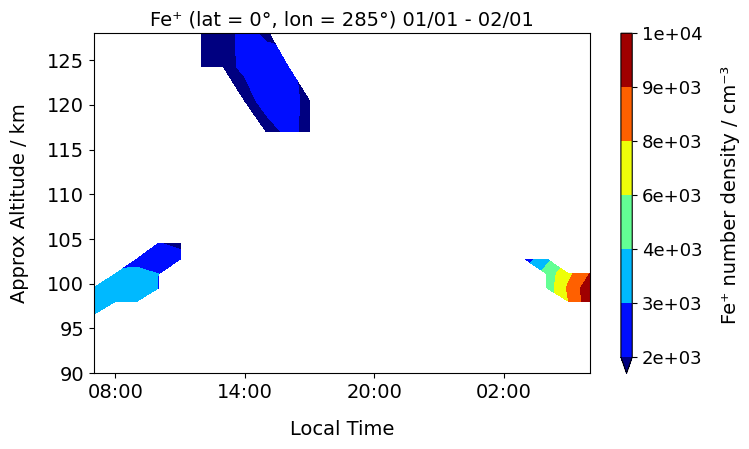

In [245]:
#### Linear Scale ######
####  sel_SpEsns  ######

hr = 12
timezoneshift = -5
starthr = hr+timezoneshift

sel_SpEsns_plot = sel_SpEsns[:, hr:hr+24, 0, 0]

# Assuming UT_Plot is in datetime format with hourly increments
start_date = datetime(2023, 1, 1, starthr)

num_days = 1  # Adjust the number of days as needed
UT_Plot = [start_date + timedelta(hours=starthr) for starthr in range(0, 24 * num_days)]


fig, ax = plt.subplots(figsize=(8, 5))

vmin = 1e3
vmax = 1e4
num_levels = 17

contour = ax.contourf(UT_Plot, Zavg_sl, sel_SpEsns_plot, cmap='jet',
                      norm=Normalize(vmin=vmin, vmax=vmax),
                      #norm=Normalize(),
                      #levels=np.logspace(np.log10(vmin), np.log10(vmax), num_levels),
                      extend='min'
                     )

cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30, format='%.0e')
cbar.set_label('Fe⁺ number density / cm⁻³', fontsize=14, labelpad=13)
cbar.ax.tick_params(labelsize=13)
#contour.set_clim(vmin, vmax)

# Set labels and title as needed
ax.set_xlabel('Local Time', fontsize=14, labelpad=13)
ax.set_ylabel('Approx Altitude / km', fontsize=14, labelpad=13)
ax.set_ylim([90, 128])

ax.set_title(f'Fe⁺ (lat = {target_lat}\u00b0, lon = {target_lon}\u00b0) 01/01 - 02/01', fontsize=14)

# Ensure a nice layout for the datetime x-axis labels
fig.autofmt_xdate()
# Shrink the size of the x-axis labels and set them horizontal
for label in ax.get_xticklabels():
    label.set_fontsize(12)
    label.set_rotation(0)  # Horizontal alignment
# Center the x-axis labels around each tick
ax.set_xticklabels(ax.get_xticks(), ha='center')
# Format x-axis with datetime labels
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))  # Set major locator every 2 hours
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)

ax.tick_params(axis='both', which='major', labelsize=14)

start_date_str = str(start_date).replace(' ', '_')
figname = f'Linear_Es_Layer_sel_lat_{target_lat}_lon_{target_lon}_{start_date_str}LT.png'
plt.savefig('./Figures/Wuhu_IonTr_run/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()